# TEDDY FOOD Проект по ценообразованию

### 1. Загрузка и предобработка данных

Добавим библиотеки

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Прочитаем файл

In [11]:
data = pd.read_csv('C:\\python\\1.csv')

Переименуем колонки

In [12]:
data.columns=['userid', 'org', 'date', 'services', 'sum']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13318 entries, 0 to 13317
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   userid    13318 non-null  int64  
 1   org       13318 non-null  object 
 2   date      13318 non-null  object 
 3   services  13318 non-null  object 
 4   sum       13318 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 520.4+ KB


Изменим тип данных даты

In [14]:
data['date'] = pd.to_datetime(data['date'])

Посмотрим на реализуемы продукты

In [15]:
pd.set_option('display.max_rows', 500)   
data.groupby(['services']).agg({'sum':'sum', 'userid':'count'}).reset_index().sort_values(by = 'sum', ascending = False)

,services,sum,userid
1,1 КотоДень,336549.56,3231
3,1 КотоНеделя,184518.59,219
56,ПёсоДень,163333.08,923
34,КотоНеделя,143710.89,184
32,КотоДень,117933.03,1292
58,ПёсоНеделя,110253.17,123
0,Новогодний КотоНабор,102884.00,350
51,Порция вкуснейшего корма,90721.05,854
63,Стерилизация,87365.69,254
4,1 ПёсоДень,85081.18,591


Исходя из задания заказчика нас интересуют лишь 6 продуктов. День, неделя, месяц кормления собак и День, неделя, месяц кормления кошек. Посмотрим уникальные данные из нужных нам категорий

In [16]:
print(data[data['services'].str.contains(r'день', case = False)]['services'].unique())
print(data[data['services'].str.contains(r'неделя', case = False)]['services'].unique())
print(data[data['services'].str.contains(r'месяц', case = False)]['services'].unique())

['ПёсоДень' '1 КотоДень' 'КотоДень' '1 ПёсоДень' 'Котодень']
['1 КотоНеделя' 'КотоНеделя' '1 ПёсоНеделя' 'ПёсоНеделя']
['ПёсоМесяц' '1 ПёсоМесяц' '1 КотоМесяц' 'КотоМесяц']


Отфильтруем только необходимые продукты

In [17]:
data = (data[(data['services'].str.contains(r'день', case = False)) 
             | (data['services'].str.contains(r'неделя', case = False)) 
             | data['services'].str.contains(r'месяц', case = False)])

Посмотрим на суммы

In [18]:
data['sum'].describe().reset_index().style.set_precision(2)

,index,sum
0,count,6694.00
1,mean,193.29
2,std,305.25
3,min,1.19
4,25%,94.00
5,50%,105.00
6,75%,145.00
7,max,7360.00


Много выбросов, найдем 1 и 99 перцентили и очистим данные от них

In [19]:
data['services'].unique()

array(['ПёсоДень', '1 КотоДень', '1 КотоНеделя', 'КотоНеделя', 'КотоДень',
       '1 ПёсоДень', 'Котодень', '1 ПёсоНеделя', 'ПёсоНеделя',
       'ПёсоМесяц', '1 ПёсоМесяц', '1 КотоМесяц', 'КотоМесяц'],
      dtype=object)

In [20]:
perc1 = np.percentile(data['sum'], 1)
perc99 = np.percentile(data['sum'], 99)

In [21]:
data = data.query('sum > @perc1')
data.head(10)

,userid,org,date,services,sum
0,27542,Кот и Пёс,2019-09-01 01:02:25,ПёсоДень,155.0
2,26869,Люськин дом,2019-09-01 01:03:41,1 КотоДень,87.0
3,26869,Убежище,2019-09-01 01:03:41,1 КотоДень,114.0
4,4696,"Кошачий приют ""ДОМИК""",2019-09-01 03:18:44,1 КотоНеделя,855.0
5,4696,Котофей,2019-09-01 03:18:44,1 КотоНеделя,723.0
6,4696,Добрые сердца,2019-09-01 03:18:44,КотоНеделя,750.0
7,4696,Добрые сердца,2019-09-01 03:18:44,КотоНеделя,750.0
10,27728,Шереметьевский приют,2019-09-01 09:40:34,ПёсоДень,255.0
12,27670,"Приют для кошек ""ЯрКот""",2019-09-01 10:37:03,1 КотоДень,83.0
14,2223,"Самарский приют для животных ""НадеждА""",2019-09-01 11:14:16,1 КотоДень,98.0


In [22]:
data['services'].unique()

array(['ПёсоДень', '1 КотоДень', '1 КотоНеделя', 'КотоНеделя', 'КотоДень',
       '1 ПёсоДень', 'Котодень', '1 ПёсоНеделя', 'ПёсоНеделя',
       'ПёсоМесяц', '1 ПёсоМесяц', '1 КотоМесяц', 'КотоМесяц'],
      dtype=object)

создадим столбец duration в котором проставим период оплаты

In [23]:
data['duration']= ''
data.loc[data['services'].str.lower().str.contains('день'), 'duration'] = 'day'
data.loc[data['services'].str.lower().str.contains('неделя'), 'duration'] = 'week'
data.loc[data['services'].str.lower().str.contains('месяц'), 'duration'] = 'month'

In [24]:
data['duration'].unique()

array(['day', 'week', 'month'], dtype=object)

Есть 2 типа животных. Создадим колонку animal и проставим значения

In [25]:
data['animal'] = ''

In [26]:
data['animal'][data['services'].str.contains(r'пёс', case = False)] = 'Пёсель'
data['animal'][data['services'].str.contains(r'кот', case = False)] = 'Котэ'

Приведем к единому виду services, убедимся что все в порядке

In [27]:
data['services'] = data.services.str.lower().str.replace('1', '').str.strip()
data['services'].unique()

array(['пёсодень', 'котодень', 'котонеделя', 'пёсонеделя', 'пёсомесяц',
       'котомесяц'], dtype=object)

Создадим колонку месяц

In [28]:
data['month'] = data['date'].astype('datetime64[M]')

### 2. Исследовательский анализ данных

  
    2.1 Исследуем сами товары (посмотрим на дни недели месяцы по кошкам и собакам в разрезах что и как предпочитают покупать, посмотреть на них в разрезе организаций)
    
    2.2 Исследуем покупателей(посмотрим на самих покупателей, выявить быть может закономерности, разобраться в их действиях
    
  

#### 2.1 Исследование товара, по группам

Сгруппируем данные, посмотрим на средние чеки по каждому приюту, помотрим данные

In [29]:
org_grouped = data.pivot_table(index = 'org', columns = 'duration', values = 'sum', aggfunc = ['sum', 'count']).reset_index()
org_grouped['mean_check_day'] = org_grouped['sum']['day'] / org_grouped['count']['day']
org_grouped['mean_check_week'] = org_grouped['sum']['week'] / org_grouped['count']['week']
org_grouped['mean_check_month'] = org_grouped['sum']['month'] / org_grouped['count']['month']
org_grouped = org_grouped.fillna(0)
org_grouped['total'] =  org_grouped['sum']['day'] + org_grouped['sum']['week'] + org_grouped['sum']['month']
(org_grouped.sort_values(by = 'total', ascending = False)
            .style
            .set_precision(0)
            .bar(subset=['mean_check_day', 'mean_check_week', 'mean_check_month'], align='mid', color=['#B0E0E6']))


Сгруппируем данные по приютам и по животным

In [30]:
org_grouped_animal = (data.pivot_table(
    index = 'org', 
    columns = 'animal', 
    values = 'sum', 
    aggfunc = ['sum', 'count'])
    .reset_index()
    .fillna(0)
    )
org_grouped_animal.round(1).style.set_precision(0).background_gradient(cmap='Blues')

Сделал для себя открытие, что приюты имеют узкий профиль (кто бы мог подумать да?). Иначе сделаем таблицы.

In [31]:
org_grouped_animal = data.pivot_table(index = ['animal','org'], 
                                      values = 'sum', 
                                      aggfunc = ['sum', 'count']).reset_index()
org_grouped_animal['mean_check'] = org_grouped_animal['sum'] / org_grouped_animal['count']
org_grouped_animal.style.background_gradient(cmap='Blues').set_precision(0)

,animal,org,sum,count,mean_check
,,,sum,sum,
0,Котэ,Добрые сердца,70336,354,199
1,Котэ,Кот и Пёс,34223,188,182
2,Котэ,Котофей,97089,638,152
3,Котэ,"Кошачий приют ""ДОМИК""",70767,502,141
4,Котэ,Люськин дом,94067,487,193
5,Котэ,Лёхин дом,65080,321,203
6,Котэ,Матроскин,45620,255,179
7,Котэ,"Приют для кошек ""Потеряшка""",56420,287,197
8,Котэ,"Приют для кошек ""ЯрКот""",66240,400,166


Хотел для себя убедиться, что собаки дороже в содержании чем кошки. Хочу провести анализ по 6 направлениям. День, неделя, месяц для кошек и аналогично для собак. Начнем с кошек, посмотрим какая категория продолжительности приносит выручку

In [32]:
cat_grouped_durations = data.query('animal == "Котэ"').groupby('duration').agg({'sum':'sum'}).reset_index()
cat_grouped_durations['% от общего'] = cat_grouped_durations['sum'] * 100 / cat_grouped_durations['sum'].sum()
cat_grouped_durations['duration']= cat_grouped_durations['duration'].str.replace('day','День')
cat_grouped_durations['duration']= cat_grouped_durations['duration'].str.replace('week','Неделя')
cat_grouped_durations['duration']= cat_grouped_durations['duration'].str.replace('month','Месяц')
cat_grouped_durations.style.set_precision(0)

,duration,sum,% от общего
0,День,450340,54
1,Месяц,59082,7
2,Неделя,328203,39


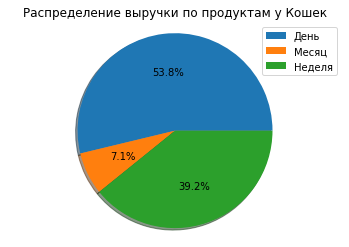

In [33]:
fig1, ax1 = plt.subplots()
ax1.pie(cat_grouped_durations['sum'], autopct='%1.1f%%', shadow=True)
plt.title('Распределение выручки по продуктам у Кошек')
ax1.axis('equal')
plt.legend(cat_grouped_durations['duration'])
plt.show()

Несмотря, на то что дневное кормление стоит дешевле, приносит оно более половины всей выручки (53,8%), затем идет месячное кормление (39,2), и с большим отрывом - месячное кормление (7,1 %). Посмотрим на средние чеки в каждой группе

In [34]:
cat_grouped_durations_mean_checks = (data.query('animal == "Котэ"')
                                     .groupby('duration')
                                     .agg({'sum':'sum', 'userid':'count'})
                                     .reset_index())
cat_grouped_durations_mean_checks['mean_check'] = cat_grouped_durations_mean_checks['sum'] / cat_grouped_durations_mean_checks['userid']
cat_grouped_durations_mean_checks[['duration','mean_check']].sort_values(by = 'mean_check')
cat_grouped_durations_mean_checks['duration']= cat_grouped_durations_mean_checks['duration'].str.replace('day','День')
cat_grouped_durations_mean_checks['duration']= cat_grouped_durations_mean_checks['duration'].str.replace('week','Неделя')
cat_grouped_durations_mean_checks['duration']= cat_grouped_durations_mean_checks['duration'].str.replace('month','Месяц')
cat_grouped_durations_mean_checks

,duration,sum,userid,mean_check
0,День,450340.0,4422,101.840796
1,Месяц,59082.0,19,3109.578947
2,Неделя,328203.0,401,818.461347


Сразу посмотрим график

Text(-16.200000000000003, 0.5, 'Период')

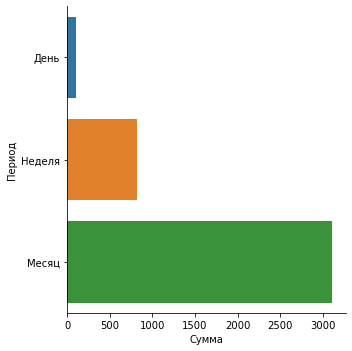

In [35]:
sns.catplot(x="mean_check", y="duration", kind="bar", data=cat_grouped_durations_mean_checks.sort_values(by = 'mean_check'))
plt.xlabel('Сумма')
plt.ylabel('Период')

Мне очень не нравится такой разрыв в средних чеках. Недельное кормление дороже дневного в 8 раз, месячное в 30. Да логика в этом есть, но как мне кажется нужно больше шагов. Сгладить переходы. Между неделей и месяцем необходим шаг, думаю отлично подошел бы шаг в 2 недели, думаю кто то хочет потратить более 800 рублей, но согласитесь следующий шаг 3000 рублей слишком большой, а вот 1600 было бы в самый раз. Котодень в принципе регулируется кнопками + и - и можно оплатить пару или тройку котодней

Раз можно регулировать количество дней, взглянем на котиков и дневные продажи ближе, начнем с описания

In [36]:
data.query('animal == "Котэ" and duration == "day"')['sum'].describe().reset_index()

,index,sum
0,count,4422.000000
1,mean,101.840796
2,std,69.392041
3,min,76.000000
4,25%,87.000000
5,50%,98.000000
6,75%,105.000000
7,max,2317.000000


Все значения около 100 рублей, кроме максимальных, найдем перцентиль 99 и посмотрим на график распределения без значений выше порога в 99 перцентилей

In [37]:
cat_day_perc99 = np.percentile(data.query('animal == "Котэ" and duration == "day"')['sum'],99)  

Text(0.5, 0, 'Сумма')

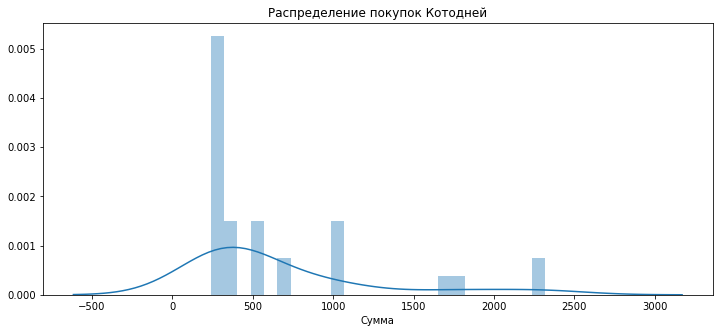

In [38]:
plt.figure(figsize=(12, 5))
plt.title('Распределение покупок Котодней')
sns.distplot(data.query('animal == "Котэ" and duration == "day" and sum > @cat_day_perc99')['sum'], bins=25)
plt.xlabel('Сумма')

Очень интересные всплески, возможно клиенты подгоняют сумму пожертвования под круглые суммы (250,500,1000) посмотрим разные участки поближе, начнем с участка 150 - 600

Text(0.5, 0, 'Сумма')

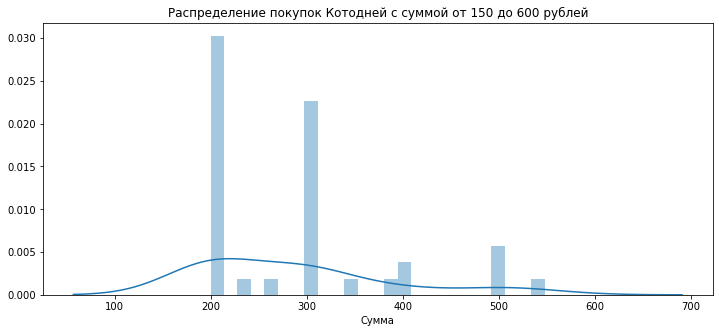

In [39]:
plt.figure(figsize=(12, 5))
plt.title('Распределение покупок Котодней с суммой от 150 до 600 рублей')
sns.distplot(data.query('animal == "Котэ" and duration == "day" and sum > 150 and sum < 600')['sum'], bins=25)
plt.xlabel('Сумма')

Да, так и есть 200, 300, 400, 500 часто встречаются, а между этими значениями практически нет данных

Text(0.5, 0, 'Сумма')

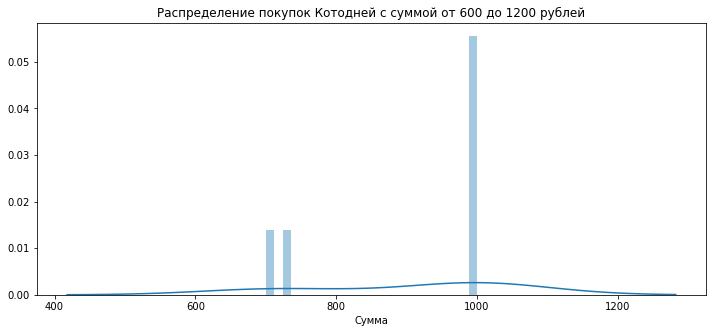

In [40]:
plt.figure(figsize=(12, 5))
plt.title('Распределение покупок Котодней с суммой от 600 до 1200 рублей')
sns.distplot(data.query('animal == "Котэ" and duration == "day" and sum > 600 and sum < 1200')['sum'], bins=25)
plt.xlabel('Сумма')

Небольшой всплекс в районе 700 рублей (возможно набирали неделю по 7 котодней), затем всплеск на значении 1000

В целом можно придти к выводу что оплату котодня иногда используют для того чтобы подогнать какую-то круглую сумму, можно изучить вопрос немного глубже, посмотреть перцентили и оценить какая часть аудитории покупает просто 1 котодень, а другая пользуется им чтобы подогнать сумму. Через метод describe мы помним что значение квантилей 75% - 105, смотрим 90, 95, 97, 98, 99 перцентили

In [41]:
np.percentile(data.query('animal == "Котэ" and duration == "day"')['sum'],[90,95,97,98,99])

array([116., 118., 118., 118., 200.])

Чаще всего покупается всего 1 котодень и только 1 % случаев покупается больше или подгоняется сумма. Посмотрим средние суммы котодней в разрезе приютов

In [42]:
org_cat_day_grouped = (data.query('animal == "Котэ" and duration == "day"')
                       .groupby('org')
                       .agg({'sum':'sum', 'userid':'count'})
                       .reset_index())
org_cat_day_grouped['mean_check'] = org_cat_day_grouped['sum'] / org_cat_day_grouped['userid']
org_cat_day_grouped.sort_values(by = 'mean_check').style.bar(subset=['sum','mean_check'], align='mid', color=['#B0E0E6']).set_precision(1)

,org,sum,userid,mean_check
3,"Кошачий приют ""ДОМИК""",34172.0,449,76.1
2,Котофей,50547.0,581,87.0
8,"Приют для кошек ""ЯрКот""",31943.0,366,87.3
1,Кот и Пёс,15053.0,161,93.5
11,ФлагманВет,2610.0,27,96.7
6,Матроскин,22540.0,230,98.0
12,Центральный приют Спб для бездомных кошек!,29307.0,292,100.4
4,Люськин дом,44238.0,432,102.4
7,"Приют для кошек ""Потеряшка""",27560.0,265,104.0
9,"Самарский приют для животных ""НадеждА""",58093.0,555,104.7


Средний чек растет от 76 до 117 очень плавно, а далее резкий скачок до 148 в Лёхином доме. Переходим к недельным данным

In [43]:
data.query('animal == "Котэ" and duration == "week"')['sum'].describe().reset_index()

,index,sum
0,count,401.000000
1,mean,818.461347
2,std,96.462190
3,min,620.000000
4,25%,723.000000
5,50%,837.000000
6,75%,870.000000
7,max,1077.000000


Сразу построим график распределений

Text(0.5, 0, 'Сумма')

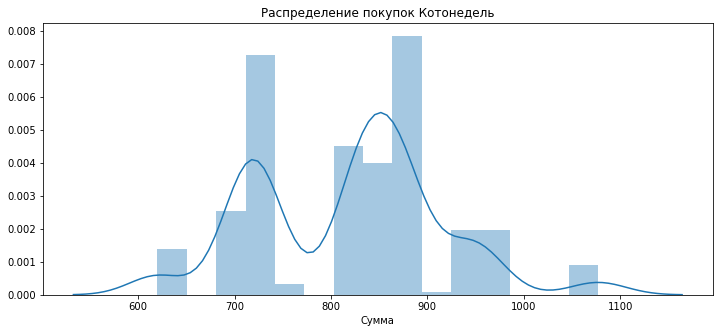

In [44]:
plt.figure(figsize=(12, 5))
plt.title('Распределение покупок Котонедель')
sns.distplot(data.query('animal == "Котэ" and duration == "week"')['sum'], bins=15)
plt.xlabel('Сумма')

Несколько пиков на разных значениях, думаю это связано с ценами в разных приютах. Посмотрим на таблиц сгрупированную по приютам

In [45]:
org_cat_week_grouped = (data.query('animal == "Котэ" and duration == "week"')
                       .groupby('org')
                       .agg({'sum':'sum', 'userid':'count'})
                       .reset_index())
org_cat_week_grouped['mean_check'] = org_cat_week_grouped['sum'] / org_cat_week_grouped['userid']
org_cat_week_grouped.sort_values(by = 'mean_check').style.bar(subset=['sum','mean_check'], align='mid', color=['#B0E0E6']).set_precision(1)

,org,sum,userid,mean_check
3,"Кошачий приют ""ДОМИК""",36595.0,53,690.5
1,Кот и Пёс,19170.0,27,710.0
2,Котофей,39042.0,54,723.0
6,Матроскин,19800.0,24,825.0
4,Люськин дом,43893.0,53,828.2
8,"Приют для кошек ""ЯрКот""",25792.0,31,832.0
7,"Приют для кошек ""Потеряшка""",15660.0,18,870.0
9,"Самарский приют для животных ""НадеждА""",46110.0,53,870.0
12,Центральный приют Спб для бездомных кошек!,18270.0,21,870.0
11,ФлагманВет,3544.0,4,886.0


Да, так и есть. Средние делятся условно по группам с шагом 50-100 рублей. Выделяется Лехин Дом 1077. Осталась месячная оплата.

Text(0.5, 0, 'Сумма')

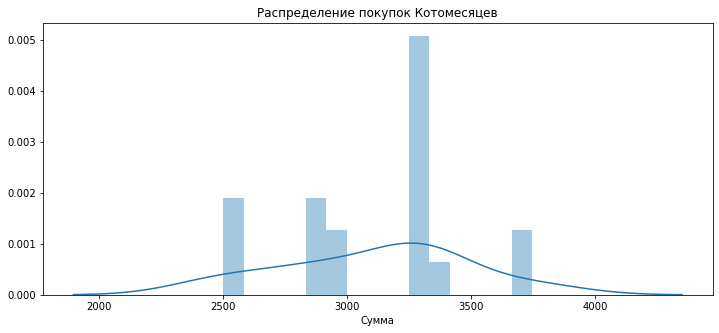

In [46]:
plt.figure(figsize=(12, 5))
plt.title('Распределение покупок Котомесяцев')
sns.distplot(data.query('animal == "Котэ" and duration == "month"')['sum'], bins=15)
plt.xlabel('Сумма')

И сразу таблица по приютам

In [47]:
org_cat_month_grouped = (data.query('animal == "Котэ" and duration == "month"')
                       .groupby('org')
                       .agg({'sum':'sum', 'userid':'count'})
                       .reset_index())
org_cat_month_grouped['mean_check'] = org_cat_month_grouped['sum'] / org_cat_month_grouped['userid']
org_cat_month_grouped.sort_values(by = 'mean_check').style.bar(subset=['sum','mean_check'], align='mid', color=['#B0E0E6']).set_precision(1)

,org,sum,userid,mean_check
1,Котофей,7500.0,3,2500.0
6,"Приют для кошек ""ЯрКот""",8505.0,3,2835.0
2,Люськин дом,5936.0,2,2968.0
0,Добрые сердца,6498.0,2,3249.0
4,Матроскин,3280.0,1,3280.0
5,"Приют для кошек ""Потеряшка""",13200.0,4,3300.0
7,"Самарский приют для животных ""НадеждА""",3300.0,1,3300.0
8,Убежище,3373.0,1,3373.0
3,Лёхин дом,7490.0,2,3745.0


Редкие оплаты, скорее исключение, также видно что не все приюты получают такую помощь. Переходим к собакам, начнем с общего. Сколько выручки приносит каждый период кормления

In [48]:
dog_grouped_durations = data.query('animal == "Пёсель"').groupby('duration').agg({'sum':'sum'}).reset_index()
dog_grouped_durations['% от общего'] = dog_grouped_durations['sum'] * 100 / dog_grouped_durations['sum'].sum()
dog_grouped_durations['duration']= dog_grouped_durations['duration'].str.replace('day','День')
dog_grouped_durations['duration']= dog_grouped_durations['duration'].str.replace('week','Неделя')
dog_grouped_durations['duration']= dog_grouped_durations['duration'].str.replace('month','Месяц')
dog_grouped_durations

,duration,sum,% от общего
0,День,248333.0,55.514621
1,Месяц,37370.0,8.354030
2,Неделя,161626.0,36.131349


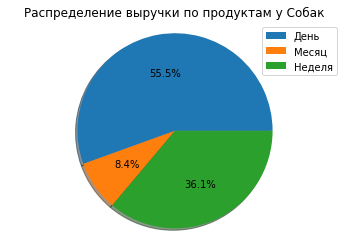

In [49]:
fig1, ax1 = plt.subplots()
ax1.pie(dog_grouped_durations['sum'], autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Распределение выручки по продуктам у Собак')
plt.legend(dog_grouped_durations['duration'])
plt.show()

Схож с графиком кошек, но дневных доля покупок больше, недельных меньше, смотрим средние чеки

In [50]:
dog_grouped_durations_mean_checks = (data.query('animal == "Пёсель"')
                                     .groupby('duration')
                                     .agg({'sum':'sum', 'userid':'count'})
                                     .reset_index())
dog_grouped_durations_mean_checks['mean_check'] = dog_grouped_durations_mean_checks['sum'] / dog_grouped_durations_mean_checks['userid']
dog_grouped_durations_mean_checks['duration']= dog_grouped_durations_mean_checks['duration'].str.replace('day','День')
dog_grouped_durations_mean_checks['duration']= dog_grouped_durations_mean_checks['duration'].str.replace('week','Неделя')
dog_grouped_durations_mean_checks['duration']= dog_grouped_durations_mean_checks['duration'].str.replace('month','Месяц')
dog_grouped_durations_mean_checks.sort_values(by = 'mean_check')

,duration,sum,userid,mean_check
0,День,248333.0,1499,165.665777
2,Неделя,161626.0,175,923.577143
1,Месяц,37370.0,12,3114.166667


Text(-16.200000000000003, 0.5, 'Период')

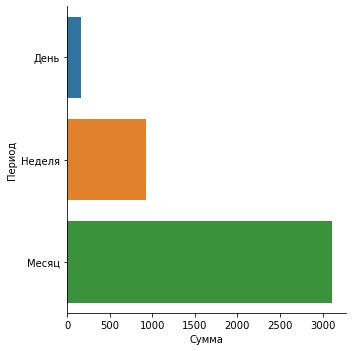

In [51]:
sns.catplot(x="mean_check", y="duration", kind="bar", data=dog_grouped_durations_mean_checks.sort_values(by = 'mean_check'))
plt.xlabel('Сумма')
plt.ylabel('Период')

Средние чеки выше кошачих, все так. А как насчет следующей идеи, к примеру в среднем 1 день стоит - 165 рублей, неделя - 1155, что если цену не 1155, а 990 и ссылочку почему дешевле? а под катом пояснение что 1 день в данном случае оплачивает спонсор или платформа, и цена получается психологически лучше - до 1000 рублей и побуждает клиента оплатить именно 7 дней, так как в данном случае спонсор также участвует (солидарная помощь). Разрыв немного сокращаем. Понимаю проблему (где взять спонсора? почему платформа должна платить?), конечно без спонсора не сработает, основная проблема

Смотрим распределение

In [52]:
data.query('animal == "Пёсель" and duration == "day"')['sum'].describe().reset_index()

,index,sum
0,count,1499.000000
1,mean,165.665777
2,std,58.029558
3,min,100.000000
4,25%,145.000000
5,50%,155.000000
6,75%,155.000000
7,max,1000.000000


Text(0.5, 0, 'Сумма')

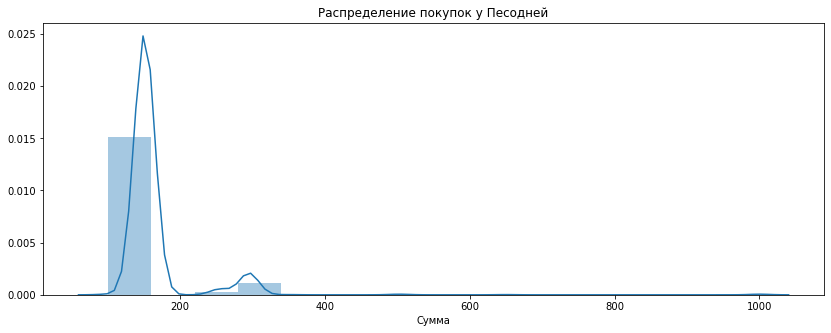

In [53]:
plt.figure(figsize=(14, 5))
plt.title('Распределение покупок у Песодней')
sns.distplot(data.query('animal == "Пёсель" and duration == "day"')['sum'], bins=15)
plt.xlabel('Сумма')

Взглянем поближе на начало графика

Text(0.5, 0, 'Сумма')

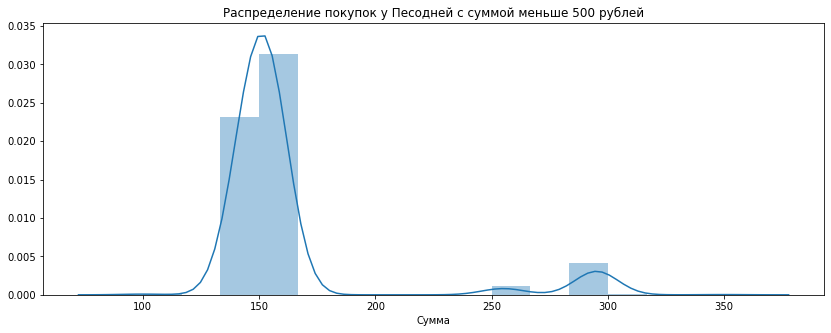

In [54]:
plt.figure(figsize=(14, 5))
plt.title('Распределение покупок у Песодней с суммой меньше 500 рублей')
sns.distplot(data.query('animal == "Пёсель" and duration == "day" and sum < 500')['sum'], bins=15)
plt.xlabel('Сумма')

Интересно, видимо достаточно часта берут 2 дня, теперь посмотрим на другую половину графика

Text(0.5, 0, 'Сумма')

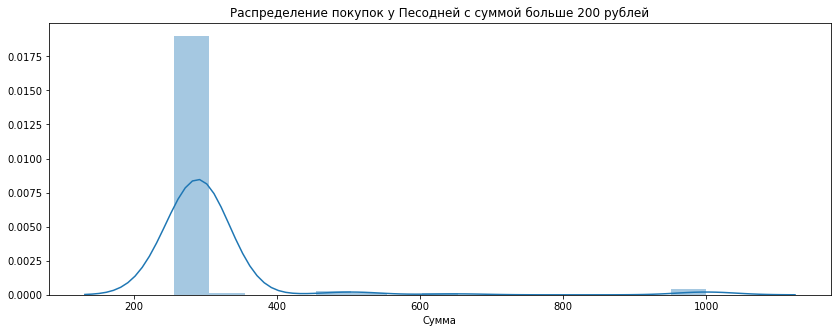

In [55]:
plt.figure(figsize=(14, 5))
plt.title('Распределение покупок у Песодней с суммой больше 200 рублей')
sns.distplot(data.query('animal == "Пёсель" and duration == "day" and sum > 200')['sum'], bins=15)
plt.xlabel('Сумма')

Да, похоже бывает что люди жертвуют какую то ровную сумму, посмотрим на БД с большими покупками

In [56]:
data.query('animal == "Пёсель" and duration == "day" and sum > 200').sort_values(by = 'sum', ascending = False).head(10)

,userid,org,date,services,sum,duration,animal,month
9972,28920,Лаюшки и Мяушки,2019-12-26 22:02:17,пёсодень,1000.0,day,Пёсель,2019-12-01
9978,25290,Лаюшки и Мяушки,2019-12-26 22:43:59,пёсодень,1000.0,day,Пёсель,2019-12-01
10153,26948,Лаюшки и Мяушки,2019-12-28 19:34:08,пёсодень,1000.0,day,Пёсель,2019-12-01
10207,4865,Лаюшки и Мяушки,2019-12-29 16:14:08,пёсодень,650.0,day,Пёсель,2019-12-01
10127,28931,Лаюшки и Мяушки,2019-12-28 13:01:52,пёсодень,508.0,day,Пёсель,2019-12-01
9943,27826,Лаюшки и Мяушки,2019-12-26 20:30:35,пёсодень,500.0,day,Пёсель,2019-12-01
9992,28843,Лаюшки и Мяушки,2019-12-27 00:03:08,пёсодень,500.0,day,Пёсель,2019-12-01
10181,28934,Лаюшки и Мяушки,2019-12-28 22:55:58,пёсодень,350.0,day,Пёсель,2019-12-01
10110,28110,Лаюшки и Мяушки,2019-12-27 22:05:40,пёсодень,300.0,day,Пёсель,2019-12-01
10089,28562,Лаюшки и Мяушки,2019-12-27 17:48:05,пёсодень,300.0,day,Пёсель,2019-12-01


Не так часто конечно встречаются крупные покупки, но вроде разные клиенты, посмотрим в разрезе организаций

In [57]:
org_dog_day_grouped = (data.query('animal == "Пёсель" and duration == "day"')
                       .groupby('org')
                       .agg({'sum':'sum', 'userid':'count'})
                       .reset_index())
org_dog_day_grouped['mean_check'] = org_dog_day_grouped['sum'] / org_dog_day_grouped['userid']
org_dog_day_grouped.sort_values(by = 'mean_check').style.bar(subset=['mean_check', 'sum'], align='mid', color=['#B0E0E6']).set_precision(0)

,org,sum,userid,mean_check
3,Мокрый нос,83520,576,145
0,4 лапы,31930,206,155
1,Кот и Пёс,40920,264,155
2,Лаюшки и Мяушки,54143,321,169
4,Шереметьевский приют,37820,132,287


В целом все средние чеки по приютам рядом, Шереметьевский несколько дороже.

In [58]:
data.query('animal == "Пёсель" and duration == "week"')['sum'].describe().reset_index()

,index,sum
0,count,175.000000
1,mean,923.577143
2,std,295.038695
3,min,800.000000
4,25%,800.000000
5,50%,860.000000
6,75%,887.000000
7,max,1950.000000


Text(0.5, 0, 'Сумма')

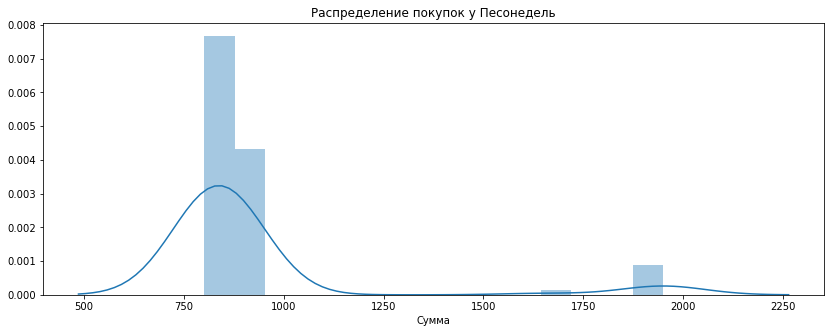

In [59]:
plt.figure(figsize=(14, 5))
sns.distplot(data.query('animal == "Пёсель" and duration == "week"')['sum'], bins=15)
plt.title('Распределение покупок у Песонедель')
plt.xlabel('Сумма')

Итересно, бывают платежи сразу 2 недели. Но в целом все сосредоточено в 1 месте. Посмотрим БД


In [60]:
data.query('animal == "Пёсель" and duration == "week" and sum > 1000').sort_values(by = 'sum', ascending = False).head(20)

,userid,org,date,services,sum,duration,animal,month
1248,27921,Шереметьевский приют,2019-09-17 20:02:03,пёсонеделя,1950.0,week,Пёсель,2019-09-01
1412,27973,Шереметьевский приют,2019-09-20 17:43:34,пёсонеделя,1950.0,week,Пёсель,2019-09-01
1581,27746,Шереметьевский приют,2019-09-23 19:15:21,пёсонеделя,1950.0,week,Пёсель,2019-09-01
1923,27746,Шереметьевский приют,2019-09-27 11:15:48,пёсонеделя,1950.0,week,Пёсель,2019-09-01
4742,26075,Шереметьевский приют,2019-10-30 14:45:01,пёсонеделя,1950.0,week,Пёсель,2019-10-01
4892,27972,Шереметьевский приют,2019-10-30 18:25:33,пёсонеделя,1950.0,week,Пёсель,2019-10-01
7425,24524,Шереметьевский приют,2019-11-28 13:04:37,пёсонеделя,1950.0,week,Пёсель,2019-11-01
8707,28536,Шереметьевский приют,2019-12-12 15:50:17,пёсонеделя,1950.0,week,Пёсель,2019-12-01
9976,25290,Шереметьевский приют,2019-12-26 22:43:59,пёсонеделя,1950.0,week,Пёсель,2019-12-01
10622,25154,Шереметьевский приют,2020-01-05 12:22:07,пёсонеделя,1950.0,week,Пёсель,2020-01-01


Достаточно крупные пожертвовония, вижу бывает от одних и тех же людей. Сгруппируем по приюту

In [61]:
org_dog_week_grouped = (data.query('animal == "Пёсель" and duration == "week"')
                       .groupby('org')
                       .agg({'sum':'sum', 'userid':'count'})
                       .reset_index())
org_dog_week_grouped['mean_check'] = org_dog_week_grouped['sum'] / org_dog_week_grouped['userid']
org_dog_week_grouped.sort_values(by = 'mean_check').style.bar(subset=['mean_check', 'sum'], align='mid', color=['#B0E0E6']).set_precision(0)

,org,sum,userid,mean_check
1,Кот и Пёс,34400,43,800
2,Лаюшки и Мяушки,33600,42,800
0,4 лапы,15480,18,860
3,Мокрый нос,51446,58,887
4,Шереметьевский приют,26700,14,1907


Все рядом, Шереметьевский особняком, идем дальше

In [62]:
data.query('animal == "Пёсель" and duration == "month"')['sum'].describe()

count      12.000000
mean     3114.166667
std      1362.634202
min      2530.000000
25%      2530.000000
50%      2530.000000
75%      3062.500000
max      7360.000000
Name: sum, dtype: float64

Text(0.5, 0, 'Сумма')

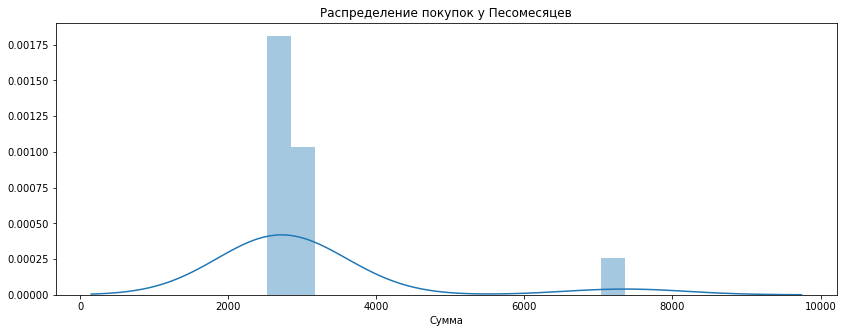

In [63]:
plt.figure(figsize=(14, 5))
sns.distplot(data.query('animal == "Пёсель" and duration == "month"')['sum'], bins=15)
plt.title('Распределение покупок у Песомесяцев')
plt.xlabel('Сумма')

Также как и в недельных наборах, все рядом возле 1 суммы и пики на 2х месячной оплате, посмотрим на транзакции

In [64]:
data.query('animal == "Пёсель" and duration == "month" and sum > 1000').sort_values(by = 'sum', ascending = False).head(20)

,userid,org,date,services,sum,duration,animal,month
3053,28114,Шереметьевский приют,2019-10-08 18:08:54,пёсомесяц,7360.0,month,Пёсель,2019-10-01
2102,25216,4 лапы,2019-09-30 10:16:31,пёсомесяц,3100.0,month,Пёсель,2019-09-01
4250,28372,4 лапы,2019-10-24 07:36:57,пёсомесяц,3100.0,month,Пёсель,2019-10-01
889,25929,Кот и Пёс,2019-09-12 17:41:13,пёсомесяц,3050.0,month,Пёсель,2019-09-01
3721,22517,Кот и Пёс,2019-10-15 10:34:16,пёсомесяц,3050.0,month,Пёсель,2019-10-01
1388,27972,Мокрый нос,2019-09-20 16:41:45,пёсомесяц,2530.0,month,Пёсель,2019-09-01
1389,27972,Мокрый нос,2019-09-20 16:41:45,пёсомесяц,2530.0,month,Пёсель,2019-09-01
3784,5669,Мокрый нос,2019-10-16 18:49:09,пёсомесяц,2530.0,month,Пёсель,2019-10-01
7794,25216,Мокрый нос,2019-11-30 08:18:35,пёсомесяц,2530.0,month,Пёсель,2019-11-01
11427,5669,Мокрый нос,2020-01-20 23:28:24,пёсомесяц,2530.0,month,Пёсель,2020-01-01


Сама категория месячных наборов редкая, а выброс всего один. Сгруппируем по приютам

In [65]:
org_dog_month_grouped = (data.query('animal == "Пёсель" and duration == "month"')
                       .groupby('org')
                       .agg({'sum':'sum', 'userid':'count'})
                       .reset_index())
org_dog_month_grouped['mean_check'] = org_dog_month_grouped['sum'] / org_dog_month_grouped['userid']
org_dog_month_grouped.sort_values(by = 'mean_check').style.bar(subset=['mean_check', 'sum'], align='mid', color=['#B0E0E6']).set_precision(0)

,org,sum,userid,mean_check
2,Мокрый нос,17710,7,2530
1,Кот и Пёс,6100,2,3050
0,4 лапы,6200,2,3100
3,Шереметьевский приют,7360,1,7360


Все стабильно без сюрпризов, на примере шереметьевского мы можем рассмотреть насколько эффективна стратегия когда у тебя средние цены выше, в пункте 3 исследования (исследования по приютам), еще для себя отметил что Мокрый нос имея психологически приятную цену 2530, сделал 7 продаж, в то время как перейдя порог в 3000 рублей Кот и ПЕс и 4 лапы сделали по 2 продажи, а Шереметьевский  одну.

### Расмотрев 6 типов товаров пришел к некоторым наблюдениям

- Между группами товаров разбитыми по периоду слишком большой разрыв (неделя стоит в 7 раз дороже дня, психологически большой шаг)
- Цены не совсем верные визуально (например есть цена 2530, лучше бы 2490, еще лучше 1990)
- В случае, если получится найди спонсора можно сделать дисконт (как бы человек покупает больше и должен купить по более выгодной цене).

#### 2.2 Исследование покупателей

Сгруппируем по юзер айди, посмотрим топ

In [66]:
users_grouped = (data
     .groupby('userid')
     .agg({'sum':'sum', 'duration':'count'})
     .reset_index()
     .sort_values(by = 'duration', ascending = False))
users_grouped.columns = ['userid', 'sum', 'count']
users_grouped.head(10)

,userid,sum,count
824,27895,25371.0,249
52,1810,15438.0,157
706,27529,25213.0,97
196,5747,7012.0,69
965,28179,5854.0,51
422,25218,6831.0,49
1046,28477,4606.0,44
580,26664,3955.0,38
668,27285,7455.0,38
464,25573,3900.0,38


вот они чемпионы, посмотрим, как часто совершаются транзакции польpователем

In [67]:
users_grouped['count'].describe().reset_index().style.set_precision(2)

,index,count
0,count,1344.00
1,mean,4.86
2,std,10.40
3,min,1.00
4,25%,1.00
5,50%,2.00
6,75%,5.00
7,max,249.00


In [68]:
users_grouped['count'].median()

2.0

Text(0.5, 0, 'Количество покупок')

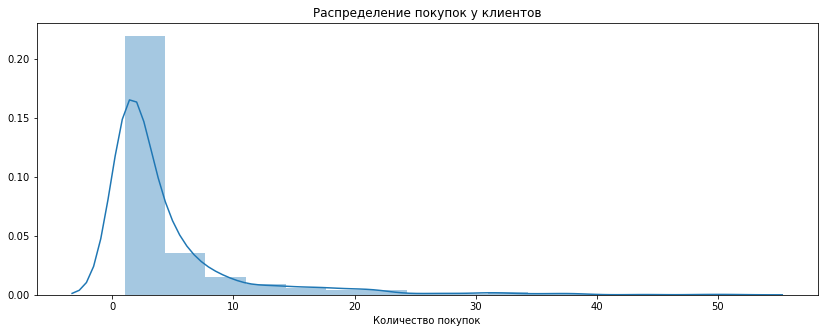

In [69]:
plt.figure(figsize=(14, 5))
sns.distplot(users_grouped.query('0 < count < 52')['count'], bins=15)
plt.title('Распределение покупок у клиентов')
plt.xlabel('Количество покупок')

Это достаточно регулярное занятие, данные у нас за 6 месяцев, в среднем 4,82 покупки на пользователя из за больших выбросов, медиана 2. То есть за полгода клиенты жертвуют дважды за полгода. 

In [70]:
data

,userid,org,date,services,sum,duration,animal,month
0,27542,Кот и Пёс,2019-09-01 01:02:25,пёсодень,155.0,day,Пёсель,2019-09-01
2,26869,Люськин дом,2019-09-01 01:03:41,котодень,87.0,day,Котэ,2019-09-01
3,26869,Убежище,2019-09-01 01:03:41,котодень,114.0,day,Котэ,2019-09-01
4,4696,"Кошачий приют ""ДОМИК""",2019-09-01 03:18:44,котонеделя,855.0,week,Котэ,2019-09-01
5,4696,Котофей,2019-09-01 03:18:44,котонеделя,723.0,week,Котэ,2019-09-01
...,...,...,...,...,...,...,...,...
13311,29162,Люськин дом,2020-02-19 23:37:11,котодень,97.0,day,Котэ,2020-02-01
13313,25958,Лаюшки и Мяушки,2020-02-20 02:44:09,пёсодень,155.0,day,Пёсель,2020-02-01
13314,25958,Шереметьевский приют,2020-02-20 02:47:49,пёсодень,295.0,day,Пёсель,2020-02-01
13315,29164,Матроскин,2020-02-20 06:08:11,котодень,98.0,day,Котэ,2020-02-01


In [71]:
users_first_buy = data.groupby('userid').agg({'month':'min'}).reset_index()
users_first_buy.columns = ['userid', 'first_buy_month']
data = data.merge(users_first_buy, on = 'userid')
data

,userid,org,date,services,sum,duration,animal,month,first_buy_month
0,27542,Кот и Пёс,2019-09-01 01:02:25,пёсодень,155.0,day,Пёсель,2019-09-01,2019-09-01
1,27542,Мокрый нос,2019-09-01 12:40:04,пёсодень,145.0,day,Пёсель,2019-09-01,2019-09-01
2,26869,Люськин дом,2019-09-01 01:03:41,котодень,87.0,day,Котэ,2019-09-01,2019-09-01
3,26869,Убежище,2019-09-01 01:03:41,котодень,114.0,day,Котэ,2019-09-01,2019-09-01
4,26869,"Приют для кошек ""Потеряшка""",2019-10-06 18:48:42,котодень,104.0,day,Котэ,2019-10-01,2019-09-01
...,...,...,...,...,...,...,...,...,...
6523,29160,Лаюшки и Мяушки,2020-02-19 22:37:43,пёсодень,155.0,day,Пёсель,2020-02-01,2020-02-01
6524,29162,Люськин дом,2020-02-19 23:37:11,котодень,97.0,day,Котэ,2020-02-01,2020-02-01
6525,29162,Люськин дом,2020-02-19 23:37:11,котодень,97.0,day,Котэ,2020-02-01,2020-02-01
6526,29164,Матроскин,2020-02-20 06:08:11,котодень,98.0,day,Котэ,2020-02-01,2020-02-01


Посмотрим по когортам, по месяцам, как часто возвращаются клиенты

In [72]:
data_cohorts_grouped = data.pivot_table(index = 'month', 
                                        columns = 'first_buy_month', 
                                        values = 'userid', 
                                        aggfunc = 'count')
data_cohorts_grouped.fillna(0).style.background_gradient(cmap='Blues').set_precision(0)

first_buy_month,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
month,,,,,,
2019-09-01 00:00:00,1226,0,0,0,0,0
2019-10-01 00:00:00,635,822,0,0,0,0
2019-11-01 00:00:00,569,268,579,0,0,0
2019-12-01 00:00:00,447,189,149,382,0,0
2020-01-01 00:00:00,272,98,82,62,244,0
2020-02-01 00:00:00,157,53,44,36,55,159


Достаточно регулярная аудитория, клиенты получается покупают 2жды за 6 месяцев, а не 1 раз 2 покупки. Также не вижу всплесков в текущих когортах (может надо делать email рассылку напоминать про себя аккуратно(статьей какой или новыми питомцами) или же email рассылка идет на  частой постоянной основе и потому такая хорошая активность). Переходим к среднему чеку клиентов

In [73]:
users_grouped['mean_check'] = users_grouped['sum'] / users_grouped['count']
users_grouped = users_grouped.query('count > 0')
users_grouped['mean_check'].describe().reset_index()

,index,mean_check
0,count,1344.000000
1,mean,218.081813
2,std,340.857942
3,min,76.000000
4,25%,98.000000
5,50%,116.000000
6,75%,155.000000
7,max,7360.000000


In [74]:
users_grouped['mean_check'].median()

116.0

Средний чек 219 рублей, в то время как медианный 116. Нижняя граница - чаще всего клиенты приобретают 1 день.

In [75]:
perc3 = np.percentile(users_grouped['mean_check'],99)   

Text(0.5, 0, 'Сумма')

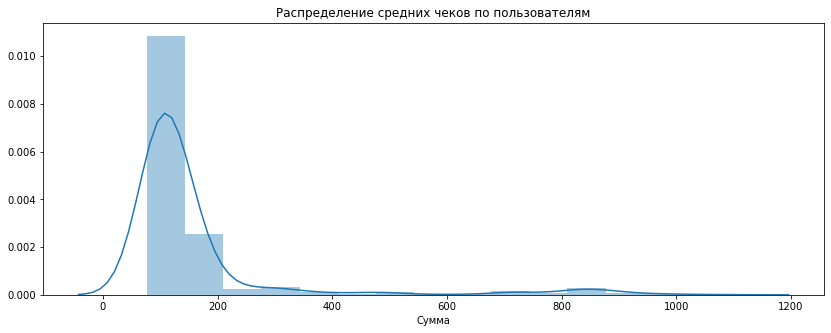

In [76]:
plt.figure(figsize=(14, 5))
sns.distplot(users_grouped.query('sum < @perc3')['mean_check'], bins=15)
plt.title('Распределение средних чеков по пользователям')
plt.xlabel('Сумма')

Попробуем условно разделить на группы по среднему чеку.

1 группа 0 - 300 средний чек (1 кормление попадет сюда)

2 группа 300 - 600 средний чек (2х дневное кормление)

3 группа 600-2000 средний чек (недельное кормление 1 или 2)

4 группа свыше 2000 (месяц и более)

In [77]:
users_grouped['group'] = 0

In [78]:
users_grouped.loc[(users_grouped['mean_check'] >= 1) & (users_grouped['mean_check'] <300), 'group'] = '1 группа (0 - 300)'
users_grouped.loc[(users_grouped['mean_check'] >= 300) & (users_grouped['mean_check'] <600), 'group'] = '2 группа (300 - 600)'
users_grouped.loc[(users_grouped['mean_check'] >= 600) & (users_grouped['mean_check'] <2000), 'group'] = '3 группа (600 - 2000)'
users_grouped.loc[(users_grouped['mean_check'] >= 2000), 'group'] = '4 группа (свыше 2000)'

In [79]:
users_check_group = users_grouped.groupby('group').agg({'sum':'sum', 'count':'sum'}).reset_index()
users_check_group

,group,sum,count
0,1 группа (0 - 300),734330.0,5726
1,2 группа (300 - 600),169760.0,381
2,3 группа (600 - 2000),345794.0,409
3,4 группа (свыше 2000),35070.0,12


Клиенты условно разбитые на категории. Задача скорее перевести из 1 группы во вторую, создавая промежуточный (нет такокого товара 2 кормления), также необходимо создать товар 2 котонедели или 2 песонедели. с 2 кото и песо неделями появится мостик между недельной и месячной кормежкой, большой разрыв между 3 и 4 группой.

### 3 Выводы

Сгруппируем данные по приюту и посчитаем выручку по продукту по всем периодам, выведем средние чеки

In [80]:
org_grouped = data.query('animal == "Котэ"').pivot_table(index = 'org', columns = 'duration', values = 'sum', aggfunc = ['sum', 'count']).reset_index()
org_grouped['mean_check_day'] = org_grouped['sum']['day'] / org_grouped['count']['day']
org_grouped['mean_check_week'] = org_grouped['sum']['week'] / org_grouped['count']['week']
org_grouped['mean_check_month'] = org_grouped['sum']['month'] / org_grouped['count']['month']
org_grouped = org_grouped.fillna(0)
org_grouped['total'] =  org_grouped['sum']['day'] + org_grouped['sum']['week'] + org_grouped['sum']['month']
org_grouped = org_grouped.sort_values(by = 'mean_check_day', ascending = False)
org_grouped['day_week'] = org_grouped['mean_check_week'] / org_grouped['mean_check_day']
org_grouped['week_month'] = org_grouped['mean_check_month'] / org_grouped['mean_check_week']
org_grouped[['org','mean_check_day','mean_check_week', 'mean_check_month', 'total']].style.set_precision(1).background_gradient(cmap='Blues')


,org,mean_check_day,mean_check_week,mean_check_month,total
duration,,,,,
5,Лёхин дом,148.5,1077.0,3745.0,65080.0
10,Убежище,117.3,937.0,3373.0,76549.0
0,Добрые сердца,116.8,928.3,3249.0,70336.0
9,"Самарский приют для животных ""НадеждА""",104.7,870.0,3300.0,107503.0
7,"Приют для кошек ""Потеряшка""",104.0,870.0,3300.0,56420.0
4,Люськин дом,102.4,828.2,2968.0,94067.0
12,Центральный приют Спб для бездомных кошек!,100.4,870.0,0.0,47577.0
6,Матроскин,98.0,825.0,3280.0,45620.0
11,ФлагманВет,96.7,886.0,0.0,6154.0


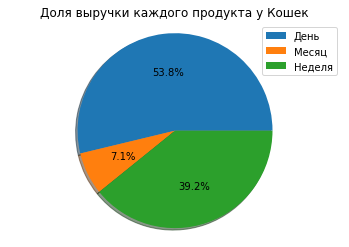

In [81]:
#выручка по продуктам для котов
fig1, ax1 = plt.subplots()
ax1.pie(cat_grouped_durations['sum'], autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.legend(cat_grouped_durations['duration'])
plt.title('Доля выручки каждого продукта у Кошек')
plt.show()

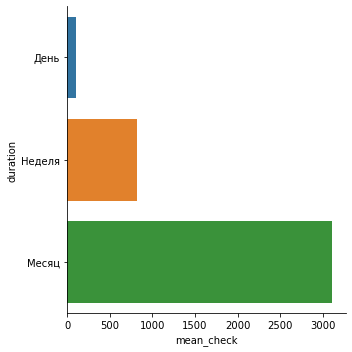

In [82]:
#средний чеки по котам
sns.catplot(x="mean_check", y="duration", kind="bar", data=cat_grouped_durations_mean_checks.sort_values(by = 'mean_check'));

Начнем с 1 котодня. Как я вижу главную задачу - сократить разрыв между котоднями и котонеделями и котонеделями и котомесяцами. Чтобы поднять относительную ценность продукта в нашей группе необходимо увеличить стоимость 1КОТОДНЯ до уровня 90-149 рублей (судя по Лехиному дому это не стршная цифра клиенты готовы отдавать такую сумму)

Дальше у нас - 1 котонеделя. Если у нас цены 1 котодня от 90 до 149 рублей, я бы сделал недельный корм - 690 рублей (так же размазав от 690 до 890). В случае, если появится возможность солидарных пожертвований со спонсором, я бы вообще остановился на цене 590-790 (+- 1 день от спонсора).

Дальше бы сделал 1 продукт 2 котонедели за 1290 рублей, (990 если будет спонсор (+-3 дня от спонсора)). Психологический мостик между 1 неделей и 1 месяцем.

Следом - 1 котомесяц - 2490-2990, отлично подойдет и психологически легче воспринимается, со спонсором 1990-2390 (солидарная помощь растет, с увеличением суммы абсолютно и в % отношении) Посмотрим что получится

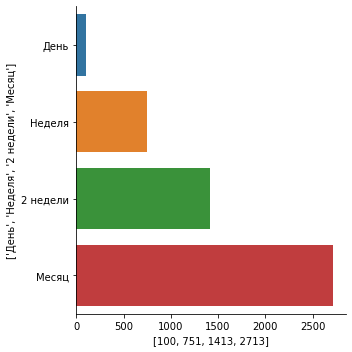

In [83]:
sns.catplot(x=[100, 751, 1413, 2713], 
            y=['День', 'Неделя', '2 недели', 'Месяц'], 
            kind="bar", 
            data=cat_grouped_durations_mean_checks
            .sort_values(by = 'mean_check'));

Более гладко, и логично, повысили ценность WEEK опять же добавив продукт - 2WEEK. Далее собаки. Сделаем сводную, посмотрим снова графики

In [84]:
org_grouped = data.query('animal == "Пёсель"').pivot_table(index = 'org', columns = 'duration', values = 'sum', aggfunc = ['sum', 'count']).reset_index()
org_grouped['mean_check_day'] = org_grouped['sum']['day'] / org_grouped['count']['day']
org_grouped['mean_check_week'] = org_grouped['sum']['week'] / org_grouped['count']['week']
org_grouped['mean_check_month'] = org_grouped['sum']['month'] / org_grouped['count']['month']
org_grouped = org_grouped.fillna(0)
org_grouped['total'] =  org_grouped['sum']['day'] + org_grouped['sum']['week'] + org_grouped['sum']['month']
org_grouped = org_grouped.sort_values(by = 'mean_check_day', ascending = False)
org_grouped['day_week'] = org_grouped['mean_check_week'] / org_grouped['mean_check_day']
org_grouped['week_month'] = org_grouped['mean_check_month'] / org_grouped['mean_check_week']
org_grouped[['org','mean_check_day','mean_check_week', 'mean_check_month', 'total']].style.set_precision(1).background_gradient(cmap='Blues')

,org,mean_check_day,mean_check_week,mean_check_month,total
duration,,,,,
4,Шереметьевский приют,286.5,1907.1,7360.0,71880.0
2,Лаюшки и Мяушки,168.7,800.0,0.0,87743.0
0,4 лапы,155.0,860.0,3100.0,53610.0
1,Кот и Пёс,155.0,800.0,3050.0,81420.0
3,Мокрый нос,145.0,887.0,2530.0,152676.0


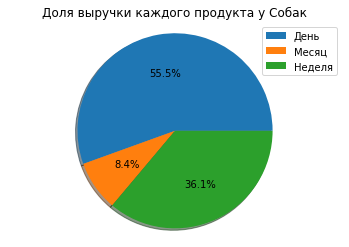

In [85]:
fig1, ax1 = plt.subplots()
ax1.pie(dog_grouped_durations['sum'], autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.legend(dog_grouped_durations['duration'])
plt.title('Доля выручки каждого продукта у Собак')
plt.show()

Структура выручки схожа с кошачей, посмотрим средние чеки

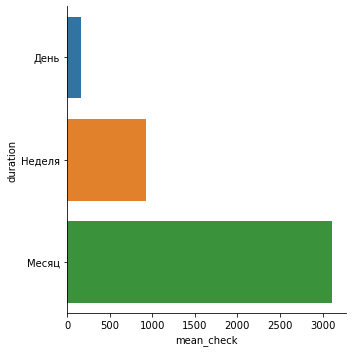

In [86]:
sns.catplot(x="mean_check", y="duration", kind="bar", data=dog_grouped_durations_mean_checks.sort_values(by = 'mean_check'));

Да, очень все похоже, освежили цифры в памяти, поехали. 1 песодень - 190 рублей, 1песонеделя - 790 рублей, 2 песонедели - 1490 рублей, 1песомесяц - 2990. Я засомневался про шереметьевский только, уж очень там цены велики. Я бы его не трогал, разобрался бы в нюансах и их конкретной специфики

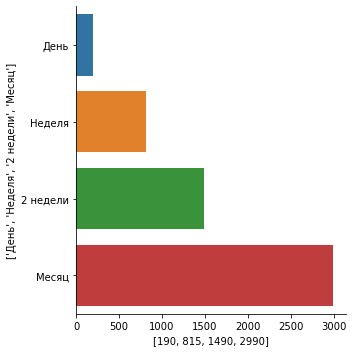

In [87]:
sns.catplot(x=[190, 815, 1490, 2990], 
            y=['День', 'Неделя', '2 недели', 'Месяц'], 
            kind="bar", 
            data=cat_grouped_durations_mean_checks
            .sort_values(by = 'mean_check'));